# WW resummation

In [13]:
import os, sys, pickle, copy
import datetime
sys.path.append(os.getcwd() + "/../")
from prep_ana_II import *
from cross_section_calc import calc_cross_stuff, cross_calc, stat_unc_calc, normalization_unc_calc
import warnings
warnings.filterwarnings("ignore")

home /home/gunter/WW_analysis/production/Analysis_13TeV
Loading binning options...
Loading plotting options
unc_mc_process and scales are parameter dictionaries


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

from ROOT import TFile

Welcome to JupyROOT 6.10/00


In [2]:
f = TFile.Open("../tools/WW_pTresummation_13-master/MyRatioWWpTHistogramAll.root", "r")

In [15]:
wwpt = f.Get("wwpt")
wwpt_scaleup = f.Get("wwpt_scaleup")
wwpt_scaledown = f.Get("wwpt_scaledown")
wwpt_reup = f.Get("wwpt_resumup")
wwpt_redown = f.Get("wwpt_resumdown")


In [23]:
arr_wwpt = []
arr_scaleup = []
arr_scaledown = []
arr_reup = []
arr_redown = []
x = []

for i in range(1, 1001):
    arr_wwpt.append(wwpt.GetBinContent(i))
    arr_scaleup.append(wwpt_scaleup.GetBinContent(i))
    arr_scaledown.append(wwpt_scaledown.GetBinContent(i))
    arr_reup.append(wwpt_reup.GetBinContent(i))
    arr_redown.append(wwpt_redown.GetBinContent(i))
    x.append( 500 * i / 1000.0)
    
        
arr_wwpt = np.array(arr_wwpt)
arr_scaleup = np.array(arr_scaleup)
arr_scaledown = np.array(arr_scaledown)
arr_reup = np.array(arr_reup)
arr_redown = np.array(arr_redown)
x_ = np.array(x) - 500.0/(2*1000.0)

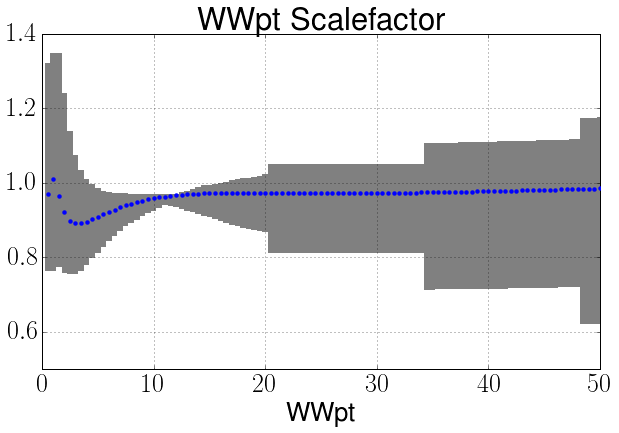

In [36]:
matplotlib.rcParams.update({'font.size': 26})

plt.figure(figsize=(10,6))
plt.title('WWpt Scalefactor')

top = np.max(np.array([arr_scaledown, arr_scaleup, arr_reup, arr_redown]), axis=0)
bottom = np.min(np.array([arr_scaledown, arr_scaleup, arr_reup, arr_redown]), axis=0)
        
p1 = plt.bar(x_, arr_wwpt * (top-bottom), color=[.50,.50,.50, 1], width=1000.0/1000.0 ,edgecolor=[0,0,0,0], zorder=2,
             bottom=arr_wwpt * bottom)
p3 = plt.scatter(x, arr_wwpt, zorder=3, edgecolors=[0,0,0,0], )#marker="_")

plt.grid()
plt.xlabel("WWpt")
#plt.ylim(0,1.6)
plt.xlim(0,50)
plt.savefig("wwpt_scalefactor.pdf")
plt.show()